# First model

## Autoencoder

Features:

* eth_source
* eth_dst 
* ip_src 
* ip_dst
* ip.len
* ip.tos 
* ip.ttl
* ip.version
* flag_type ('FIN', 'SYN', 'RST', 'PSH', 'ACK', 'URG', 'ECE','CWR', 'UNK')
* length
* load (first 20 bytes)
* load.count
* type of ip.src
* type of ip.dst
* protocol (tcp/udp)
* protocol.dport
* protocol.sport

Scaling: Standard Scalar

In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_df import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

normal_df = pd.read_csv('../data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('../data/attack1.csv')
processed_attack = process_df(attack_df)

In [2]:
processed_normal.columns

Index(['octet_1_eth_dst', 'octet_2_eth_dst', 'octet_3_eth_dst',
       'octet_4_eth_dst', 'octet_5_eth_dst', 'octet_6_eth_dst',
       'octet_1_eth_src', 'octet_2_eth_src', 'octet_3_eth_src',
       'octet_4_eth_src', 'octet_5_eth_src', 'octet_6_eth_src',
       'octet_1_ip_src', 'octet_2_ip_src', 'octet_3_ip_src', 'octet_4_ip_src',
       'octet_1_ip_dst', 'octet_2_ip_dst', 'octet_3_ip_dst', 'octet_4_ip_dst',
       'length', 'eth.type', 'ip.version', 'ip.proto', 'ip.len', 'ip.ihl',
       'ip.tos', 'ip.ttl', 'load.count', 'FIN', 'SYN', 'RST', 'PSH', 'ACK',
       'URG', 'ECE', 'CWR', 'UNK', 'source_docker_bridge', 'source_dns',
       'source_service', 'source_pod', 'source_external',
       'destination_docker_bridge', 'destination_dns', 'destination_service',
       'destination_pod', 'destination_external', 'load_0', 'load_1', 'load_2',
       'load_3', 'load_4', 'load_5', 'load_6', 'load_7', 'load_8', 'load_9',
       'load_10', 'load_11', 'load_12', 'load_13', 'load_14', 'load_1

In [3]:
x_normal_train, x_normal_test = train_test_split(processed_normal.values, test_size=0.2, random_state=42)

In [4]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation

# model = Sequential()
# model.add(Dense(40, input_dim=processed_normal.values.shape[1], activation='ReLU'))
# model.add(Dense(4, activation='ReLU'))
# model.add(Dense(40, activation='ReLU'))
# model.add(Dense(processed_normal.values.shape[1]))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_normal_train,x_normal_train,verbose=1,epochs=30)
# model.save("model_1_new")

In [6]:
import keras
model = keras.models.load_model('model_1_new')

Metal device set to: Apple M1 Pro


2022-03-26 19:02:06.842806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-26 19:02:06.843067: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
# from sklearn import metrics
# pred_normal_train = model.predict(x_normal_train)
# print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

# pred_normal_test = model.predict(x_normal_test)
# print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

2022-03-26 19:02:15.438991: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-26 19:02:15.493473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.32354723251546713
0.3248214245621417


In [8]:
pred_normal = model.predict(processed_normal.values)

<AxesSubplot:>

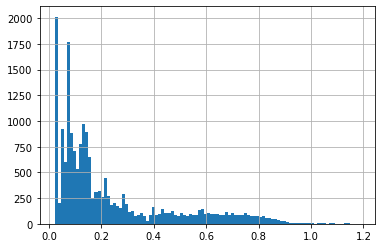

In [9]:
normal_score_list = [0]*pred_normal.shape[0]

normal_df['score'] = 0

random_index = [random.randint(0, pred_normal.shape[0]) for x in range(20000)]

for index in random_index:
    normal_score_list[index]= (metrics.mean_squared_error(pred_normal[index],processed_normal.values[index], squared=False))

normal_df['score'] = normal_score_list

copy_normal_df = normal_df[normal_df['score'] !=0]

copy_normal_df['score'].hist(bins = 100)

<AxesSubplot:>

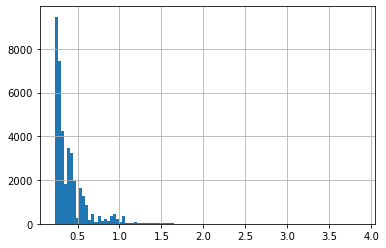

In [10]:
pred_attack = model.predict(processed_attack.values)
attack_score_list = [0]*pred_attack.shape[0]

attack_df['score'] = 0

random_index = [random.randint(0, pred_attack.shape[0]) for x in range(40000)]


for index in random_index:
    attack_score_list[index] = metrics.mean_squared_error(processed_attack.values[index],pred_attack[index],squared=False)

attack_df['score'] = attack_score_list

copy_attack_df = attack_df[attack_df['score'] !=0]

copy_attack_df['score'].hist(bins = 100)

<AxesSubplot:>

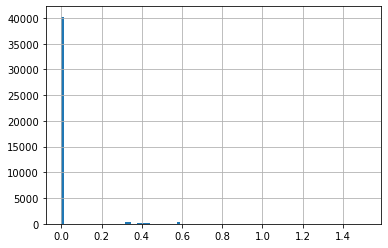

In [11]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']
nmap_df['score'].hist(bins = 100)